In [18]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math 
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
# Load the dataset
file_path = "../data/nberces5818v1_n2012.csv"
df = pd.read_csv(file_path)

# Display basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22204 entries, 0 to 22203
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   naics    22204 non-null  int64  
 1   year     22204 non-null  int64  
 2   emp      22087 non-null  float64
 3   pay      22087 non-null  float64
 4   prode    22087 non-null  float64
 5   prodh    22087 non-null  float64
 6   prodw    22087 non-null  float64
 7   vship    22087 non-null  float64
 8   matcost  22087 non-null  float64
 9   vadd     22087 non-null  float64
 10  invest   21723 non-null  float64
 11  invent   22087 non-null  float64
 12  energy   22087 non-null  float64
 13  cap      21359 non-null  float64
 14  equip    21359 non-null  float64
 15  plant    21359 non-null  float64
 16  piship   22087 non-null  float64
 17  pimat    22087 non-null  float64
 18  piinv    21359 non-null  float64
 19  pien     22087 non-null  float64
 20  dtfp5    20995 non-null  float64
 21  tfp5     213

In [19]:
df.tail(100)

,naics,year,emp,pay,prode,prodh,prodw,vship,matcost,vadd,...,equip,plant,piship,pimat,piinv,pien,dtfp5,tfp5,dtfp4,tfp4
22104,339995,1980,12.4,161.1,9.5,19.4,100.0,667.4,341.4,328.8,...,169.2,267.0,0.285,0.476,0.808,0.563,0.004,1.629,0.004,1.627
22105,339995,1981,10.6,149.6,8.2,16.5,95.4,674.0,330.7,342.8,...,167.6,270.0,0.303,0.515,0.878,0.590,0.041,1.696,0.041,1.695
22106,339995,1982,10.3,145.1,8.1,15.3,98.0,682.1,309.7,374.6,...,170.9,269.3,0.323,0.529,0.915,0.614,0.010,1.714,0.010,1.713
22107,339995,1983,10.3,151.2,8.3,17.0,106.0,689.7,275.1,408.3,...,180.7,272.6,0.334,0.543,0.921,0.633,0.018,1.744,0.018,1.744
22108,339995,1984,9.0,147.4,6.9,13.6,97.4,704.9,332.6,373.5,...,181.9,269.0,0.344,0.556,0.923,0.642,-0.049,1.661,-0.049,1.660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22199,339999,2014,58.3,2657.0,35.5,67.6,1167.7,13857.3,5213.5,8686.0,...,4152.0,1267.9,0.999,1.012,1.014,1.183,-0.011,1.044,-0.011,1.044
22200,339999,2015,58.5,2738.9,34.6,66.7,1190.0,13848.1,5018.4,8883.6,...,4034.4,1275.9,1.013,0.983,1.015,1.167,-0.007,1.038,-0.007,1.037
22201,339999,2016,57.2,2807.3,34.3,65.7,1255.5,13997.7,4981.3,8994.6,...,4030.3,1298.8,1.014,0.972,1.013,1.125,0.013,1.051,0.013,1.051
22202,339999,2017,49.1,2381.6,32.5,60.3,1259.4,11981.0,4404.1,7569.6,...,NaN,NaN,1.019,1.003,NaN,1.253,NaN,NaN,NaN,NaN


In [20]:
df.head(100)

,naics,year,emp,pay,prode,prodh,prodw,vship,matcost,vadd,...,equip,plant,piship,pimat,piinv,pien,dtfp5,tfp5,dtfp4,tfp4
0,311111,1958,18.0,81.3,12.0,25.7,49.8,1042.4,752.4,266.9,...,517.6,695.0,0.354,0.133,0.168,0.116,NaN,0.317,NaN,0.318
1,311111,1959,17.9,82.5,11.8,25.5,49.4,1051.0,758.9,268.7,...,573.7,725.3,0.345,0.131,0.169,0.115,0.002,0.318,0.002,0.318
2,311111,1960,17.7,84.8,11.7,25.4,50.0,1050.2,752.8,269.9,...,611.6,739.2,0.274,0.129,0.173,0.119,0.217,0.394,0.216,0.395
3,311111,1961,17.5,87.4,11.5,25.4,51.4,1119.7,803.6,287.8,...,642.6,752.0,0.273,0.131,0.172,0.117,0.024,0.404,0.024,0.405
4,311111,1962,17.6,90.2,11.5,25.2,52.1,1175.7,853.3,294.5,...,669.1,768.7,0.277,0.132,0.174,0.119,-0.007,0.401,-0.007,0.402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,311119,1992,35.4,872.9,19.6,41.3,416.1,14361.4,11477.7,2873.1,...,3244.6,2145.6,0.490,0.378,0.766,0.697,-0.009,0.839,-0.008,0.836
96,311119,1993,33.7,870.0,19.0,41.2,415.3,14844.1,11058.7,3779.8,...,3249.0,2137.1,0.499,0.391,0.780,0.712,0.072,0.901,0.072,0.899
97,311119,1994,34.1,890.3,19.0,41.0,413.4,15050.5,10902.0,4145.2,...,3219.8,2109.6,0.514,0.403,0.799,0.694,0.020,0.919,0.020,0.917
98,311119,1995,34.1,888.5,20.2,42.8,440.5,16312.9,11411.8,4939.1,...,3244.5,2112.5,0.511,0.412,0.823,0.686,0.069,0.985,0.068,0.982


In [21]:
# Check for missing values
missing_values = df.isnull().sum()

# Summary statistics
summary_stats = df.describe()

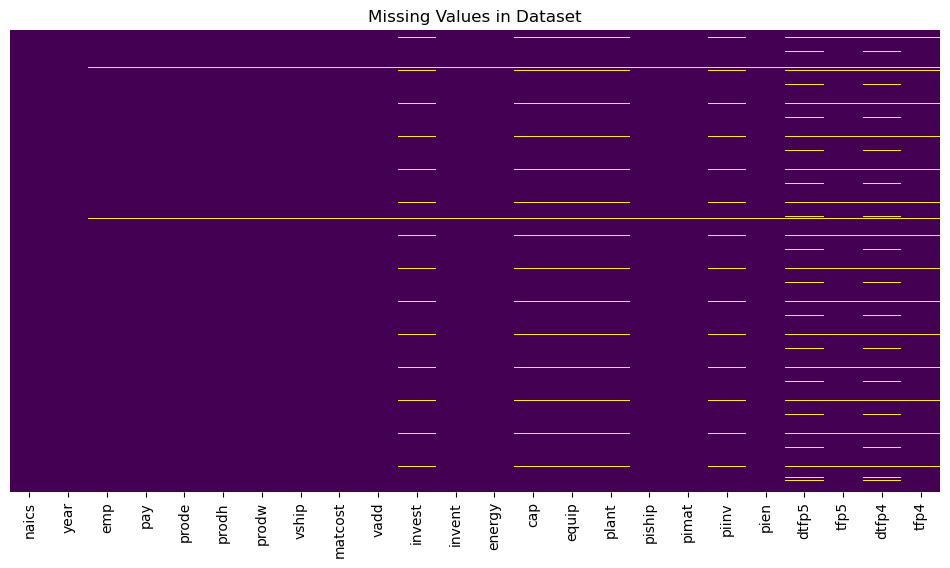

In [22]:
# Visualizing missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values in Dataset")
plt.show()

In [23]:
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)

naics      0.000000
year       0.000000
emp        0.526932
pay        0.526932
prode      0.526932
prodh      0.526932
prodw      0.526932
vship      0.526932
matcost    0.526932
vadd       0.526932
invest     2.166276
invent     0.526932
energy     0.526932
cap        3.805621
equip      3.805621
plant      3.805621
piship     0.526932
pimat      0.526932
piinv      3.805621
pien       0.526932
dtfp5      5.444965
tfp5       3.805621
dtfp4      5.444965
tfp4       3.805621
dtype: float64


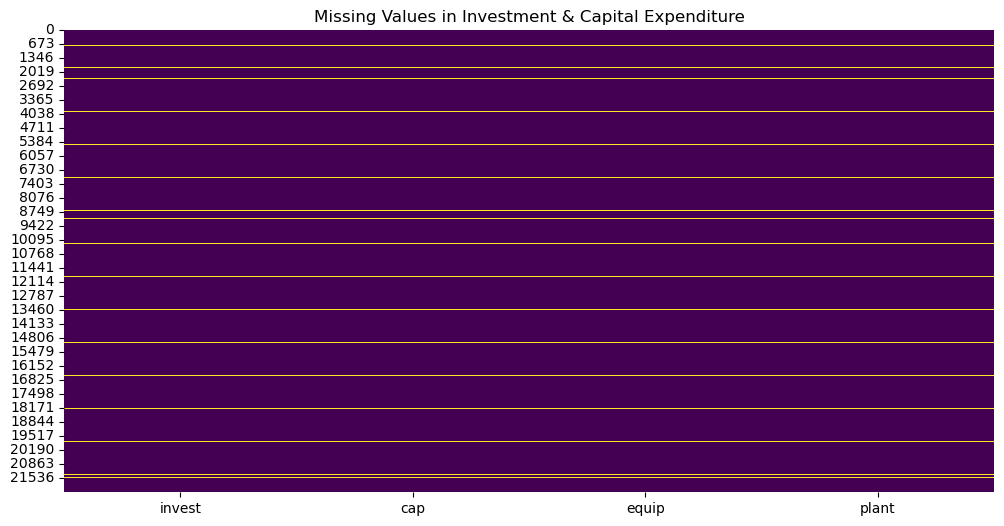

invest    2.166276
cap       3.805621
equip     3.805621
plant     3.805621
dtype: float64


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df[['invest', 'cap', 'equip', 'plant']].isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values in Investment & Capital Expenditure")
plt.show()

# Percentage of missing values
print(df[['invest', 'cap', 'equip', 'plant']].isnull().sum() / len(df) * 100)

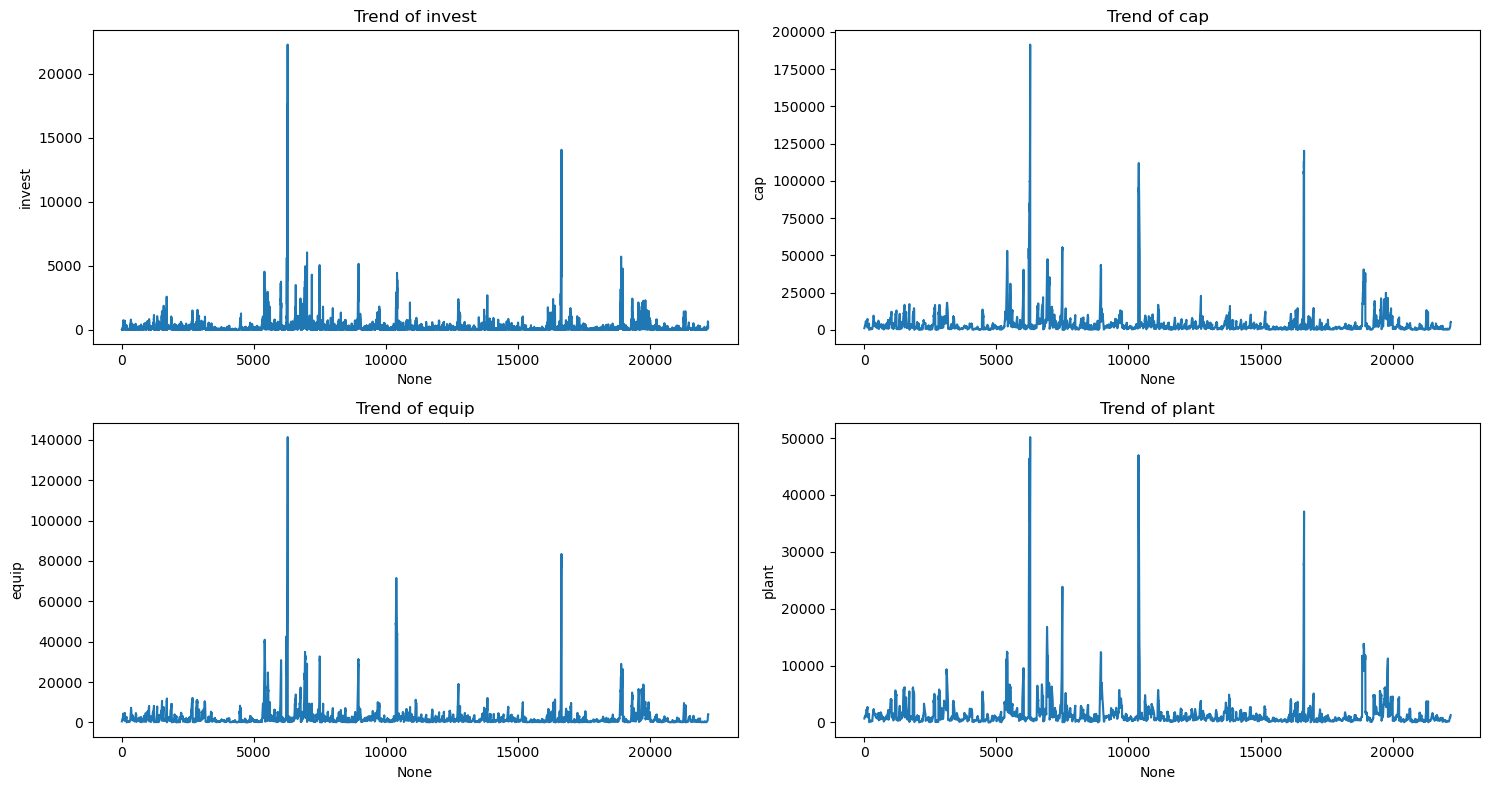

In [25]:
# Plot time-series trends for investment variables
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
cols = ['invest', 'cap', 'equip', 'plant']
for i, col in enumerate(cols):
    sns.lineplot(x=df.index, y=df[col], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f"Trend of {col}")
plt.tight_layout()
plt.show()

In [26]:
# Rolling Median (5-year window)
df[['invest', 'cap', 'equip', 'plant']] = df[['invest', 'cap', 'equip', 'plant']].rolling(5, min_periods=1).median()


In [27]:

# If significant missing values remain, apply KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
df[['invest', 'cap', 'equip', 'plant']] = knn_imputer.fit_transform(df[['invest', 'cap', 'equip', 'plant']])

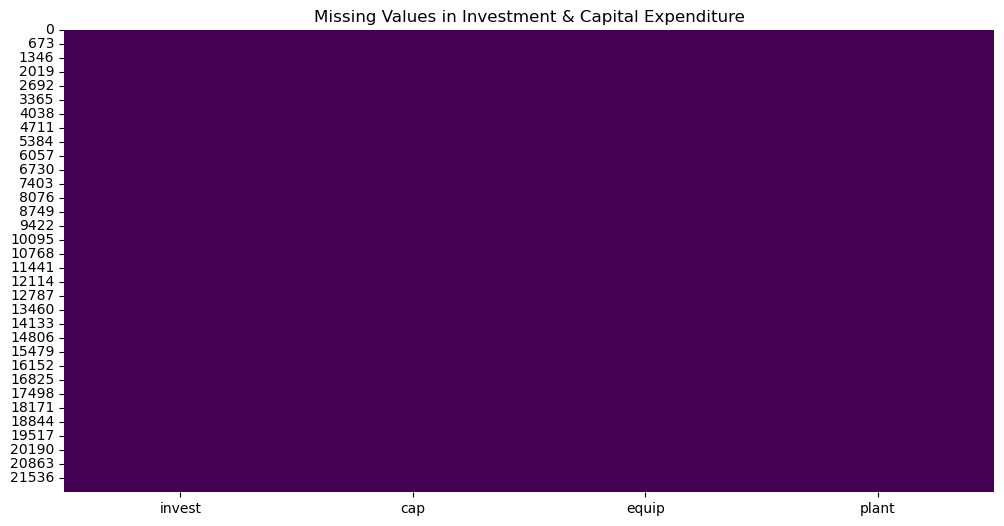

invest    0.0
cap       0.0
equip     0.0
plant     0.0
dtype: float64


In [28]:

# Visualizing missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df[['invest', 'cap', 'equip', 'plant']].isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values in Investment & Capital Expenditure")
plt.show()

# Percentage of missing values
print(df[['invest', 'cap', 'equip', 'plant']].isnull().sum() / len(df) * 100)

In [29]:
#Starting Imputation

In [30]:
#Continuous Trends	Smooth, time-dependent trends, missing values between valid ones.	
#Featurs emp, pay, prode, prodh, prodw, vship, matcost, vadd, energy	
#Interpolation Strategy Linear Interpolation / Rolling Mean

df[['emp', 'pay', 'prode', 'prodh', 'prodw', 'vship', 'matcost', 'vadd', 'energy']] = df[['emp', 'pay', 'prode', 'prodh', 'prodw', 'vship', 'matcost', 'vadd', 'energy']].interpolate(method='linear')

In [31]:
# Use Rolling Median or Trend Estimation. Since investment is periodic, we can use the rolling median to fill in missing values.
df['invest'] = df['invest'].fillna(df['invest'].rolling(5, min_periods=1).median())
#Economic indexes follow trends, so spline interpolation is best.
df['piinv'] = df['piinv'].interpolate(method='spline', order=3)

In [32]:
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)

naics      0.000000
year       0.000000
emp        0.000000
pay        0.000000
prode      0.000000
prodh      0.000000
prodw      0.000000
vship      0.000000
matcost    0.000000
vadd       0.000000
invest     0.000000
invent     0.526932
energy     0.000000
cap        0.000000
equip      0.000000
plant      0.000000
piship     0.526932
pimat      0.526932
piinv      0.000000
pien       0.526932
dtfp5      5.444965
tfp5       3.805621
dtfp4      5.444965
tfp4       3.805621
dtype: float64


In [33]:

# Macroeconomic Indicators - Use Spline Interpolation
macro_cols = ['piship', 'pimat', 'piinv', 'pien']
df[macro_cols] = df[macro_cols].interpolate(method='spline', order=3)

# # High missingness (>5%) - Predict using RandomForestRegressor
# features = ['emp', 'pay', 'prode', 'vship', 'invest', 'cap']
# targets = ['dtfp5', 'dtfp4']
# for target in targets:
#     train_data = df.dropna(subset=[target])
#     rf = RandomForestRegressor()
#     rf.fit(train_data[features], train_data[target])
#     df.loc[df[target].isna(), target] = rf.predict(df.loc[df[target].isna(), features])

# # Final validation
# print(df.isnull().sum())  # Ensure no missing values remain

# sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
# plt.title("Missing Values After Imputation")
# plt.show()


In [34]:

features = ['emp', 'pay', 'prode', 'invest', 'cap', 'matcost', 'vadd']
targets = ['tfp5', 'tfp4']

# Ensure we only train on rows with complete feature data
train_data = df.dropna(subset=targets + features)

if not train_data.empty:
    for target in targets:
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(train_data[features], train_data[target])

        # Identify rows with missing values but complete features
        missing_rows = df[df[target].isna() & df[features].notnull().all(axis=1)]
        
        if not missing_rows.empty:
            df.loc[missing_rows.index, target] = rf.predict(missing_rows[features])

# Apply KNN Imputation only to remaining missing values
knn_imputer = KNNImputer(n_neighbors=5)
df[targets] = knn_imputer.fit_transform(df[targets])

# Verify missing values are fixed
print(df[targets].isnull().sum())



tfp5    0
tfp4    0
dtype: int64


In [35]:
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)

naics      0.000000
year       0.000000
emp        0.000000
pay        0.000000
prode      0.000000
prodh      0.000000
prodw      0.000000
vship      0.000000
matcost    0.000000
vadd       0.000000
invest     0.000000
invent     0.526932
energy     0.000000
cap        0.000000
equip      0.000000
plant      0.000000
piship     0.000000
pimat      0.000000
piinv      0.000000
pien       0.000000
dtfp5      5.444965
tfp5       0.000000
dtfp4      5.444965
tfp4       0.000000
dtype: float64


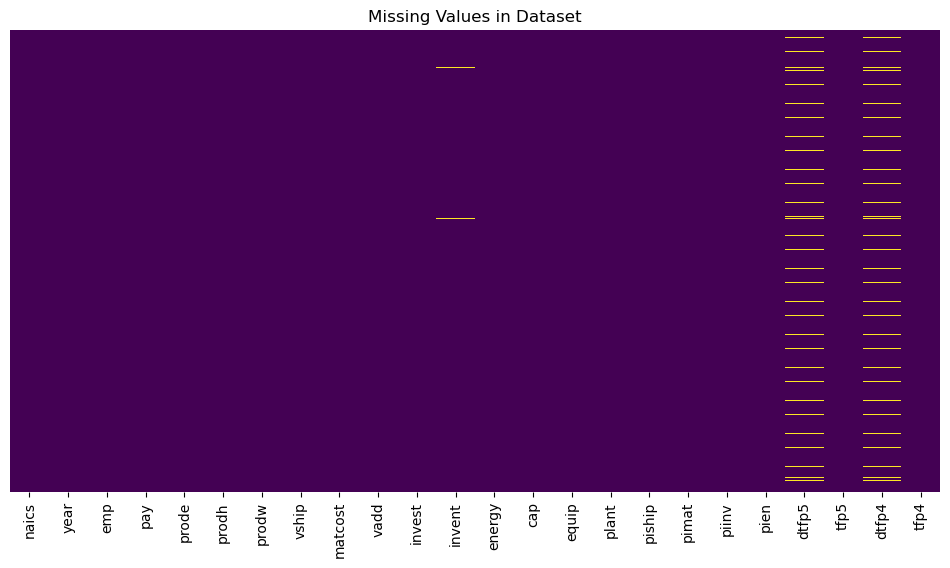

In [36]:
# Visualizing missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values in Dataset")
plt.show()

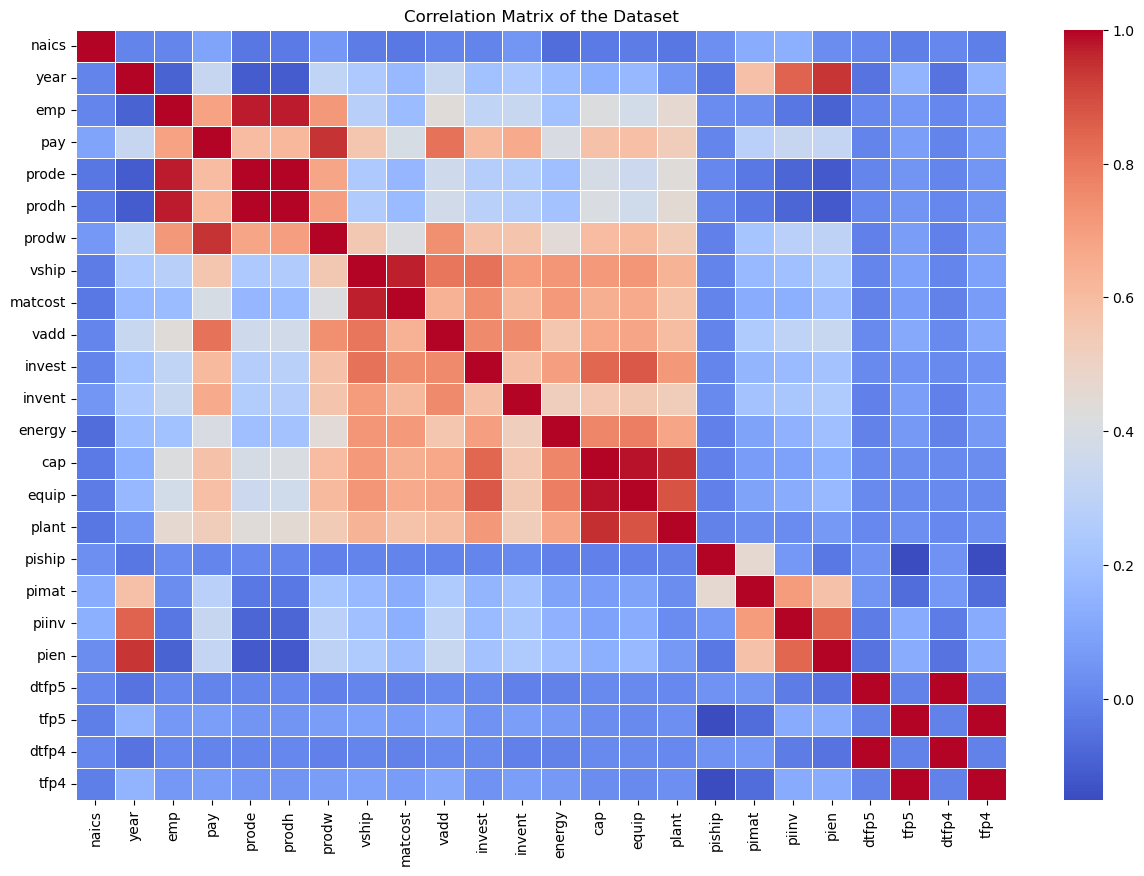

In [37]:
# Correlation Matrix
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of the Dataset")
plt.show()

In [38]:
def plot_feature_distributions(df, max_cols=3):
    """
    Plots histograms for all columns in the dataframe.
    
    Parameters:
        df (pd.DataFrame): The dataframe containing features to plot.
        max_cols (int): Maximum number of columns per row in the subplot grid.
    """
    num_features = len(df.columns)
    num_rows = math.ceil(num_features / max_cols)  # Calculate required rows

    plt.figure(figsize=(max_cols * 5, num_rows * 4))  # Adjust figure size dynamically

    for i, feature in enumerate(df.columns, 1):
        plt.subplot(num_rows, max_cols, i)
        sns.histplot(df[feature].dropna(), bins=50, kde=True)
        plt.title(f"Distribution of {feature}")

    plt.tight_layout()
    plt.show()

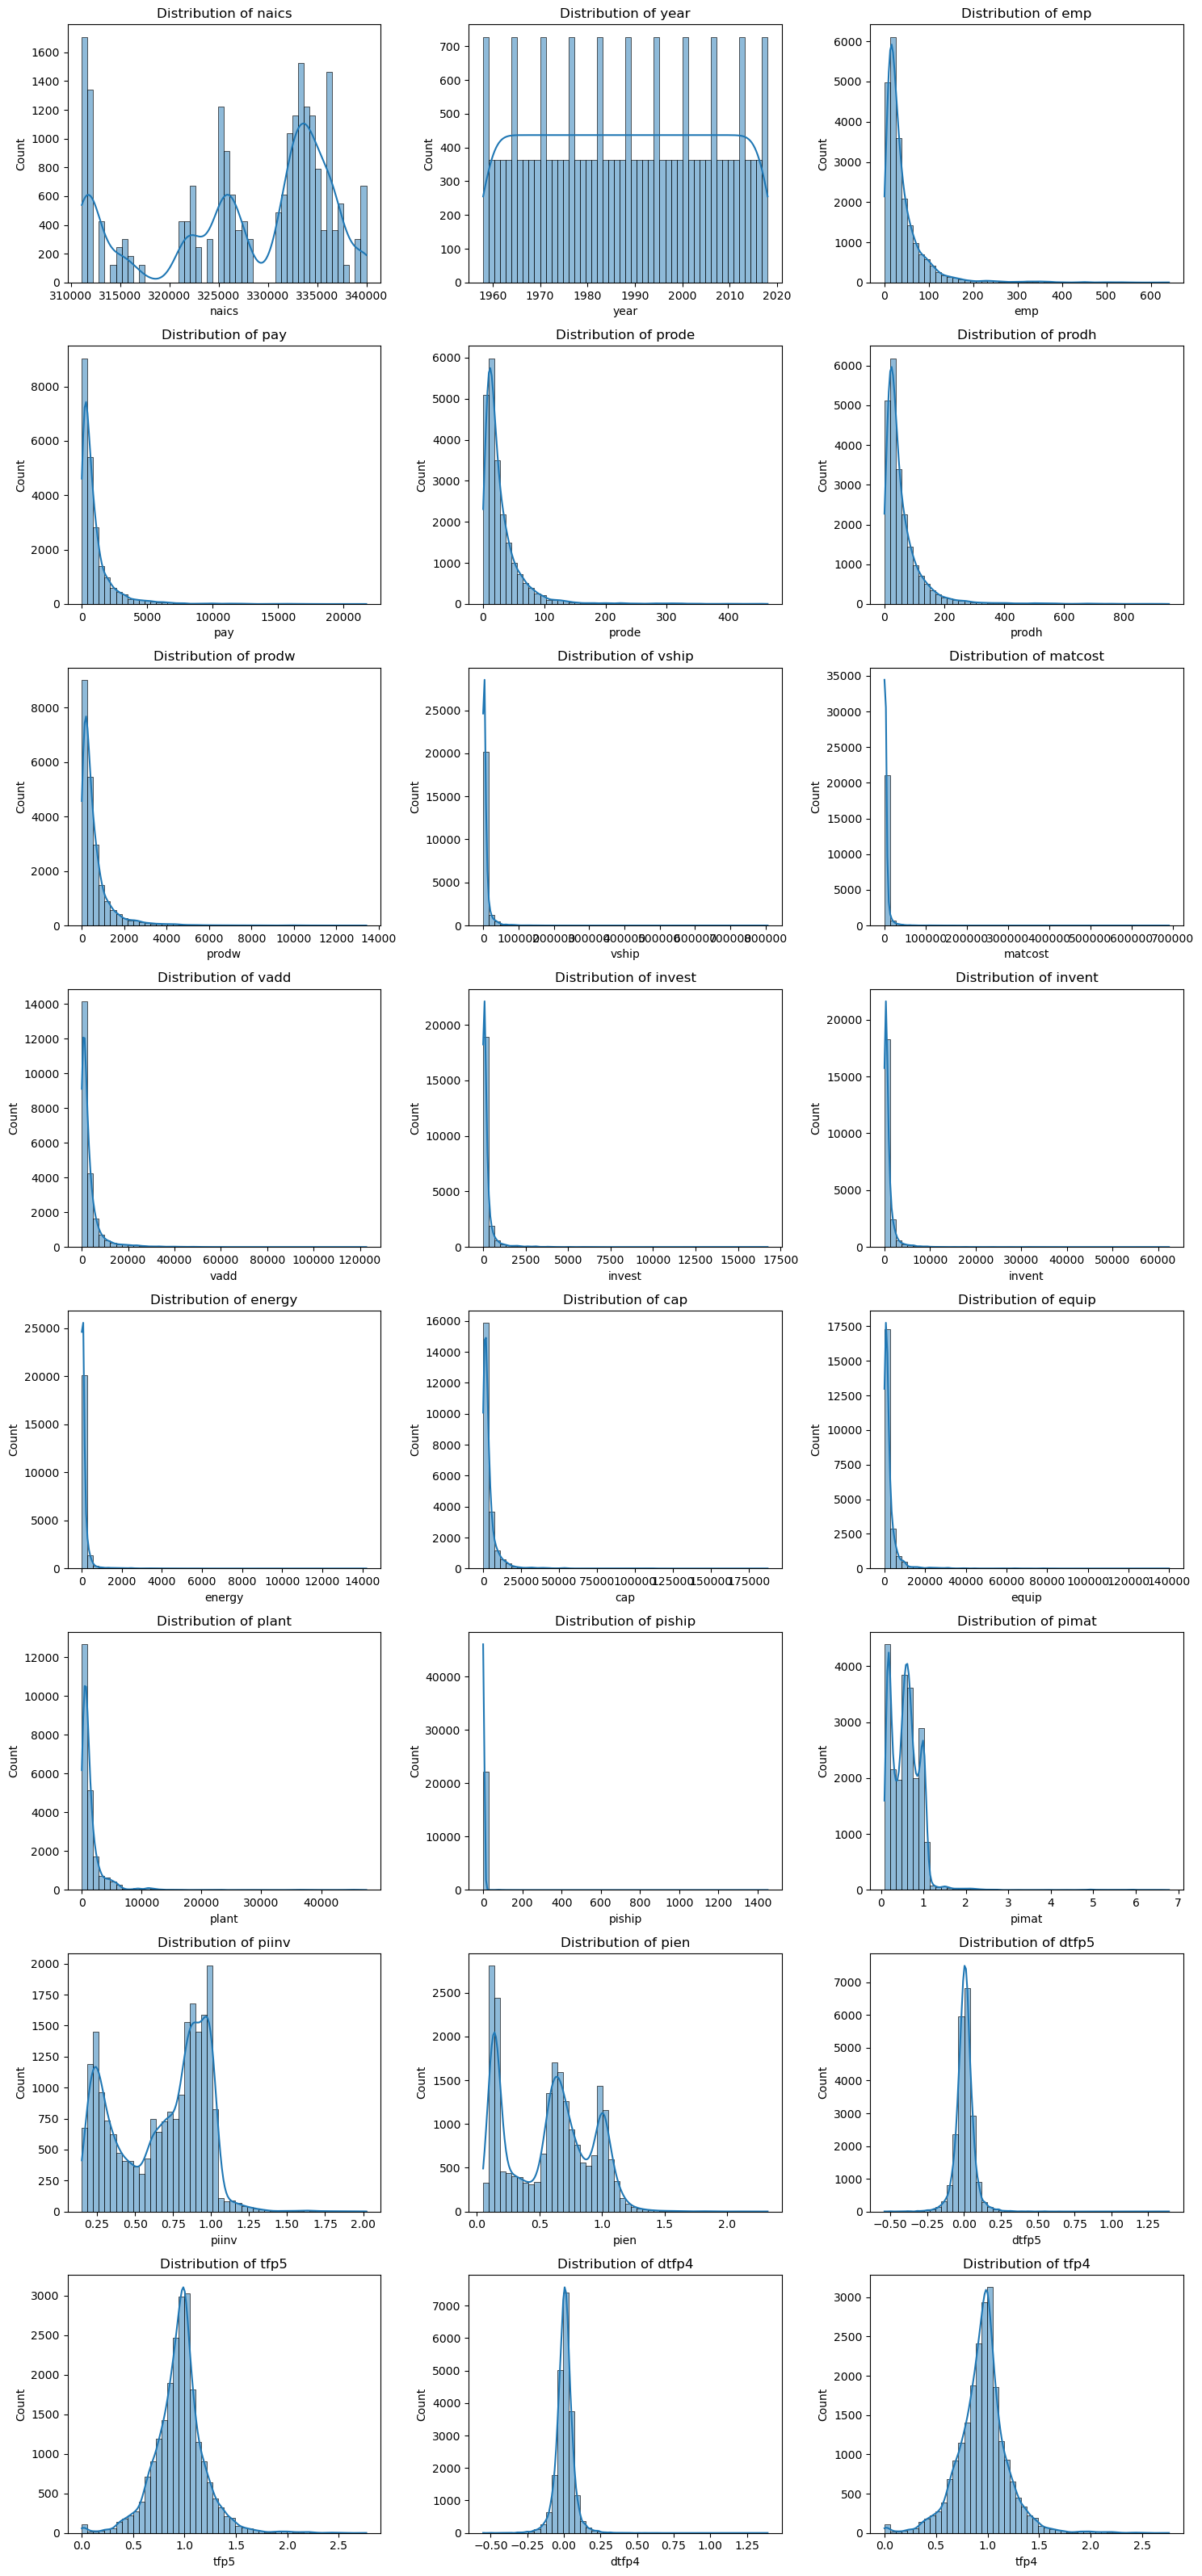

In [39]:
plot_feature_distributions(df, max_cols=3)

In [40]:
def transform_skewed_features(df, exclude_columns=['naics', 'year']):
    """
    Automatically transforms skewed numerical features while excluding specified columns.
    Stores applied transformations for inverse conversion.
    
    Returns:
    - Transformed dataframe.
    - Dictionary mapping columns to their applied transformations.
    """
    df_transformed = df.copy()
    transformations = {}  # Store applied transformations

    # Compute skewness
    skewness = df.skew()

    # Select columns to transform (excluding specified ones)
    columns_to_transform = [col for col in df.columns if col not in exclude_columns]

    # Apply transformations based on skewness levels
    for col in columns_to_transform:
        if skewness[col] > 2:  # Strongly skewed
            if df_transformed[col].min() > 0:  # Ensure positive values for log
                df_transformed[col] = np.log1p(df_transformed[col])
                transformations[col] = ('log1p', None)
            else:
                shift = abs(df_transformed[col].min()) + 1  # Ensure positivity
                df_transformed[col] = np.log1p(df_transformed[col] + shift)
                transformations[col] = ('log1p_shift', shift)
                
        elif 1.5 < skewness[col] <= 2:  # Moderately high skew
            df_transformed[col] = np.cbrt(df_transformed[col])  
            transformations[col] = ('cbrt', None)
            
        elif 0.5 < skewness[col] <= 1.5:  # Mild skew
            df_transformed[col] = np.sqrt(df_transformed[col])  
            transformations[col] = ('sqrt', None)

    return df_transformed, transformations

def restore_original_values(df_transformed, transformations):
    """
    Restores transformed values back to their original scale.
    
    Parameters:
    - df_transformed (pd.DataFrame): Transformed dataframe.
    - transformations (dict): Mapping of column names to transformation types.

    Returns:
    - Restored dataframe.
    """
    df_original = df_transformed.copy()
    
    for col, transform in transformations.items():
        if transform[0] == 'log1p':
            df_original[col] = np.expm1(df_original[col])  # Inverse of log1p
        elif transform[0] == 'log1p_shift':
            df_original[col] = np.expm1(df_original[col]) - transform[1]  # Undo shift
        elif transform[0] == 'cbrt':
            df_original[col] = df_original[col] ** 3  # Inverse of cube root
        elif transform[0] == 'sqrt':
            df_original[col] = df_original[col] ** 2  # Inverse of square root

    return df_original


In [41]:
# Step 1: Transform Data
df_transformed, transformations = transform_skewed_features(df)

# Step 2: Restore to Original Values
df_original = restore_original_values(df_transformed, transformations)

# Step 3: Check Restoration Accuracy
print(np.allclose(df, df_original, atol=1e-6))  # Should return True


False


/opt/conda/envs/portfolio/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [42]:
df.skew()

naics      -0.682348
year        0.000000
emp         4.410444
pay         4.831328
prode       4.766901
prodh       4.632040
prodw       5.063622
vship      19.830464
matcost    26.438898
vadd        7.598061
invest     12.555224
invent     12.929107
energy     11.339905
cap         8.645817
equip       9.383471
plant       8.356544
piship     32.391555
pimat       5.181881
piinv      -0.270718
pien        0.051623
dtfp5       1.020919
tfp5        0.317383
dtfp4       1.008284
tfp4        0.306514
dtype: float64

In [43]:
# Step 1: Transform Data
df_transformed, transformations = transform_skewed_features(df)

# Step 2: Restore to Original Values
df_original = restore_original_values(df_transformed, transformations)

# Verify Restoration
print()  # Should return True if all transformations are correctly reversed

# Print new skewness values
print(df_transformed.skew())


naics     -0.682348
year       0.000000
emp        0.195181
pay       -0.189452
prode      0.237456
prodh      0.137520
prodw     -0.208045
vship     -0.108497
matcost   -0.062765
vadd      -0.156561
invest     0.041676
invent    -0.175874
energy     0.157082
cap        0.040278
equip     -0.002102
plant      0.111566
piship     8.900483
pimat      0.963424
piinv     -0.270718
pien       0.051623
dtfp5      1.075375
tfp5       0.317383
dtfp4      1.089862
tfp4       0.306514
dtype: float64


/opt/conda/envs/portfolio/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


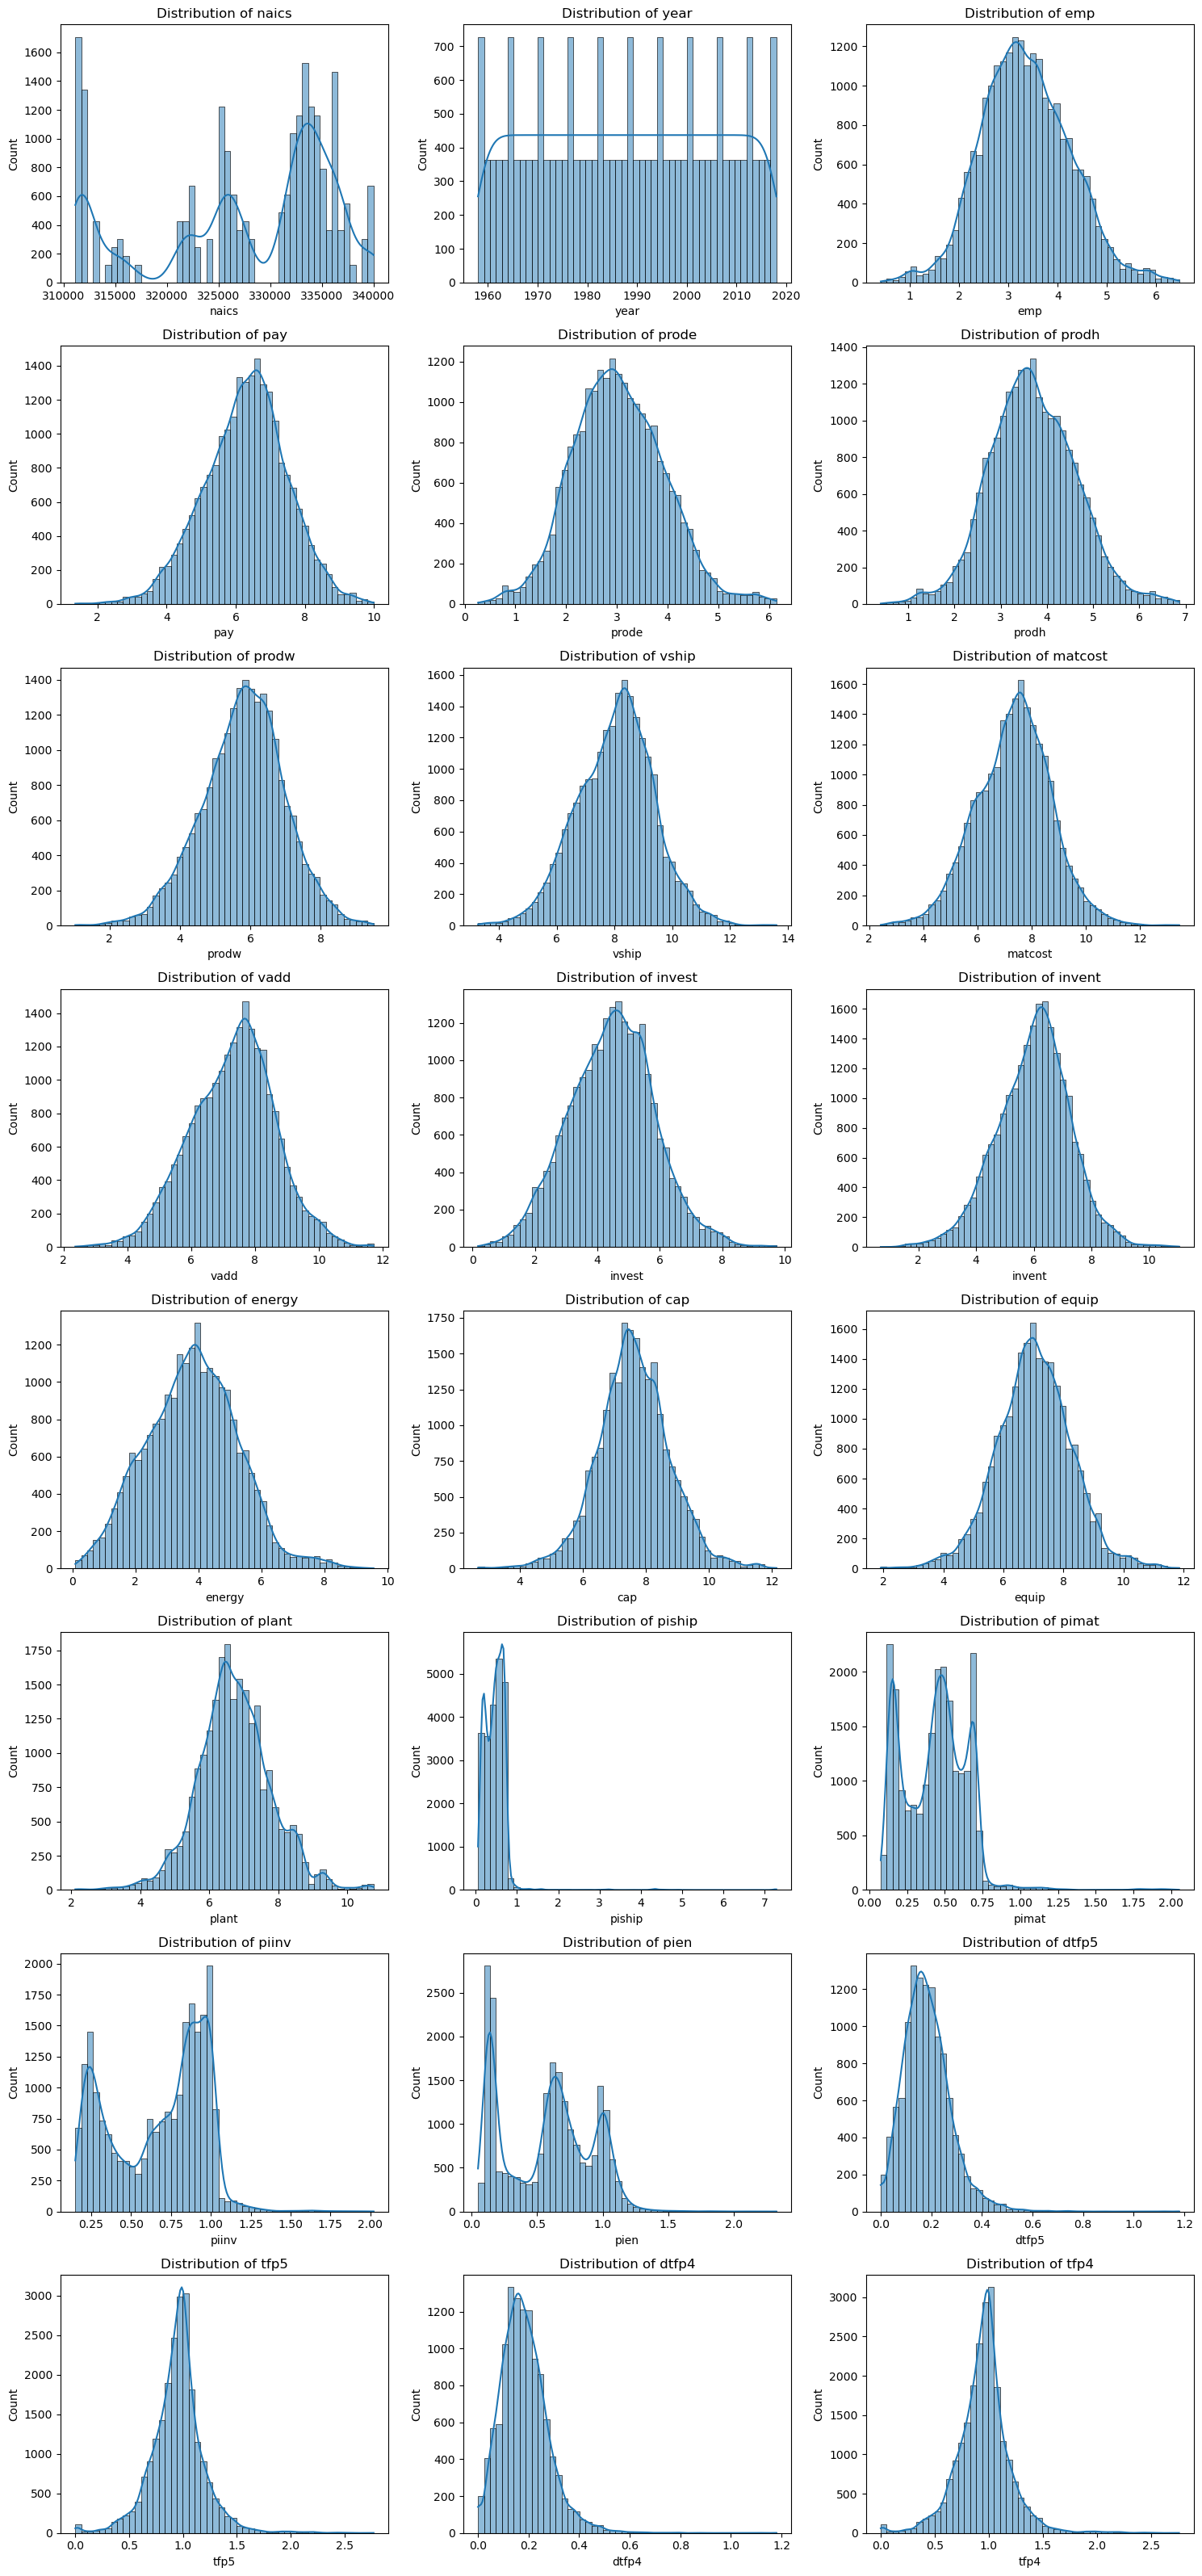

In [44]:
plot_feature_distributions(df_transformed, max_cols=3)

In [45]:
df_transformed.skew()

naics     -0.682348
year       0.000000
emp        0.195181
pay       -0.189452
prode      0.237456
prodh      0.137520
prodw     -0.208045
vship     -0.108497
matcost   -0.062765
vadd      -0.156561
invest     0.041676
invent    -0.175874
energy     0.157082
cap        0.040278
equip     -0.002102
plant      0.111566
piship     8.900483
pimat      0.963424
piinv     -0.270718
pien       0.051623
dtfp5      1.075375
tfp5       0.317383
dtfp4      1.089862
tfp4       0.306514
dtype: float64

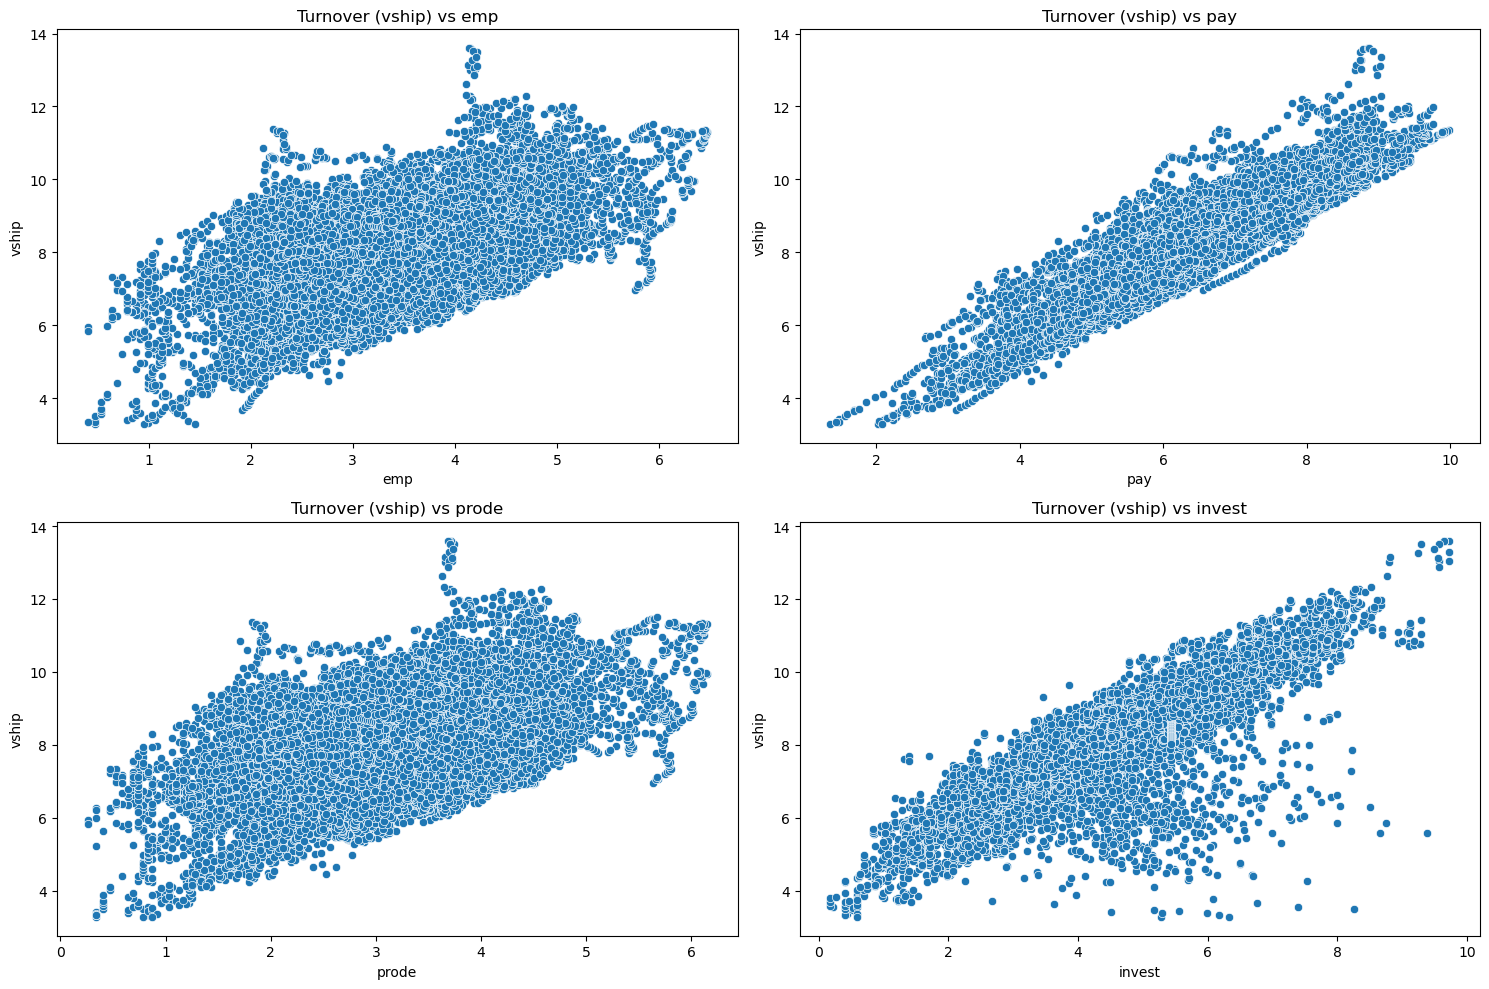

In [46]:
# Scatter Plots to Identify Relationships
plt.figure(figsize=(15, 10))
for i, feature in enumerate(["emp", "pay", "prode", "invest"], 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df_transformed[feature], y=df_transformed["vship"])
    plt.title(f"Turnover (vship) vs {feature}")
plt.tight_layout()
plt.show()